# **Exploring AirBnB in Athens**<br />

This assignment aims to a comprehensive analysis of the influence of AirBnB on the city of Athens. The dataset utilized for this investigation has been collected from "Inside AirBnB" and can be accessed [here](http://insideairbnb.com/get-the-data.html).

The analysis encompasses various facets, including:
- Prices per neighborhood
- Availability trends on a daily basis
- Reviews and occupancy statistics per listing
- Average income insights
- Listings categorized by room type
- Price distributions per day
- Listings per host <br/>

Accompanying visualizations to enhance understanding.

To conduct this exploration, several libraries have been employed, including:

- numpy
- pandas
- matplotlib.pipot
- matplotlib.style
- seaborn
- geopandas
- folium

---

> Mesolora Stamatoula Gerasimoula, Registration number: f2822308 <br />
> MSc Business Analytics  <br />
> Athens University of Economics and Business <br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import geopandas as gpd
import folium

## **Neighbourhood Listings in Descending Order**<br />

To show the listings per neighbourghood, we read the file `listings.csv.gz`and name it "listings". Then we take a look at the variables that we are going to use in order to get an overview of our data. 
These variables are:
- id: *The id of every listing*
- price: *The price ($) payed in every listing*
- neighbourhood_cleansed: *The neighbbourhood which accomodate every airbnb building*
- host_id: *The id of every host*
- number_of_reviews: *The total number of reviews of the airbnbs* 
- room_type: *The type of the buildings used as airbnb*
- host_name: *The name of the hosts*

In [2]:
listings = pd.read_csv("listings.csv.gz")
listings.loc[:, ["id", "price", "neighbourhood_cleansed", "host_id", "number_of_reviews", "room_type","host_name"]]

,id,price,neighbourhood_cleansed,host_id,number_of_reviews,room_type,host_name
0,40042598,$20.00,ΠΕΔΙΟ ΑΡΕΩΣ,158884228,0,Private room,Christos
1,39069205,$293.00,ΚΟΛΩΝΑΚΙ,299446668,0,Entire home/apt,Nikos
2,653274914834812593,$60.00,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,272702874,47,Entire home/apt,Costas
3,54361219,$93.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,433120301,40,Entire home/apt,Iordanka
4,51258073,$119.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,199937958,9,Entire home/apt,Nick
...,...,...,...,...,...,...,...
13177,36905271,$151.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,48654793,0,Hotel room,Do Disturb
13178,21695325,$54.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,41042574,168,Entire home/apt,Konstantinos
13179,651256549439046547,$214.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,67295649,0,Entire home/apt,Evelyn
13180,736573771699647347,$60.00,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,443865000,4,Entire home/apt,Sis


To display the listings by neighborhood, with the most popular neighborhoods first, we will sort the "neighborhood_cleansed" column in descending order of neighborhood popularity. The most popular neighbourhood would be the one with the most listings.<br/>
The variable "neighborhood_cleansed" contains the naighborhoods names without missing values or identical neighborhoods with different names. Althoough, it is very important to check that these conditions are satisfied.

In [3]:
print(sum(listings["neighbourhood_cleansed"].isna()))
listings["neighbourhood_cleansed"].unique()

0


array(['ΠΕΔΙΟ ΑΡΕΩΣ', 'ΚΟΛΩΝΑΚΙ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',
       'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΠΑΤΗΣΙΑ', 'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΠΑΓΚΡΑΤΙ',
       'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΓΚΥΖΗ', 'ΑΜΠΕΛΟΚΗΠΟΙ',
       'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΚΥΨΕΛΗ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΖΑΠΠΕΙΟ', 'ΑΚΡΟΠΟΛΗ', 'ΘΗΣΕΙΟ', 'ΑΝΩ ΚΥΨΕΛΗ',
       'ΚΕΡΑΜΕΙΚΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ', 'ΣΤΑΔΙΟ', 'ΙΛΙΣΙΑ',
       'ΠΟΛΥΓΩΝΟ', 'ΚΟΛΩΝΟΣ', 'ΣΕΠΟΛΙΑ', 'ΠΕΤΡΑΛΩΝΑ', 'ΓΟΥΒΑ', 'ΓΟΥΔΙ',
       'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ', 'ΒΟΤΑΝΙΚΟΣ', 'ΓΚΑΖΙ', 'ΑΝΩ ΠΑΤΗΣΙΑ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΠΡΟΜΠΟΝΑ',
       '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΚΟΛΟΚΥΝΘΟΥ', 'ΡΙΖΟΥΠΟΛΗ',
       'ΡΗΓΙΛΛΗΣ', 'ΠΕΝΤΑΓΩΝΟ'], dtype=object)

The results reveal that the "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" neighborhood stands out as the most popular, with 2.455 listings. Next in rank are the neighborhoods "ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ", "ΝΕΟΣ ΚΟΣΜΟΣ", "ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ" and "ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ" with 1.137, 1.004, 987 and 830 entries, respectively.

In [4]:
neighbourhood_counts = pd.DataFrame(listings["neighbourhood_cleansed"].value_counts().reset_index().values, columns=['neighbourhood_cleansed', 'Listings Count'])
neighbourhood_counts

,neighbourhood_cleansed,Listings Count
0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2455
1,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1137
2,ΝΕΟΣ ΚΟΣΜΟΣ,1004
3,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,987
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,830
5,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,590
6,ΠΑΓΚΡΑΤΙ,529
7,ΑΜΠΕΛΟΚΗΠΟΙ,461
8,ΚΟΛΩΝΑΚΙ,427
9,ΘΗΣΕΙΟ,397


## Neighbourhood Prices in Descending Order

In this stage of our analysis, we are going to examine the Airbnb prices in various neighborhoods. To do this, we will extract data from the "price" column in the "listings" DataFrame, associating each neighborhood with its corresponding Airbnb prices.<br />
Before proceeding, it is essential to convert the type of the "price" column to numeric for efficient processing. In addition, to deal with any missing values in the price data, we will use a strategy of replacing them with the average value according to the corresponding neighborhood. This approach ensures that our analysis remains unbiased as it moderates the impact of missing data on the overall results.

In [5]:
listings["price"] = pd.to_numeric(listings["price"].replace("[\$,]", "", regex = True), errors = "coerce")
listings["price"] = listings.groupby("neighbourhood_cleansed")["price"].transform(lambda x: x.fillna(x.mean()))
print(type(listings["price"]))
print(sum(listings["price"].isna()))

<class 'pandas.core.series.Series'>
0


Below there is a table with basic information about price, including the median and mean values, the standard deviation of price and the number of entries per neighbourhood. The table has been sorted in descending order by median values, allowing easy comparison.
<br/>

The five most expensive neighbourhods are listed below with a few points regarding their price variation.
<br/> 

From the below results we observe that:
- Neighbourhood neighborhood "ΡΗΓΙΛΛΗΣ" has a relatively high mean price compared to the median and standared deviation equal to 1.071,93, indicating a potential presence of outliers in prices that significantly influence the average.
- In "ΖΑΠΠΕΙΟ," the median and mean prices are closer, suggesting a more balanced distribution. The relatively high standard deviation implies some variability in pricing too.
- Neighborhood "ΚΟΛΩΝΑΚΙ" demonstrates a relatively low standard deviation, indicating less variability in pricing.
- In "ΑΚΡΟΠΟΛΗ," the mean is higher than the median, suggesting the presence of higher-priced listings that impact the average.
- "ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ" has a relatively low median compared to the mean, indicating potential influence from higher-priced listings too. The large count suggests a substantial number of listings in this neighborhood.

In [6]:
prices = listings.groupby("neighbourhood_cleansed")["price"].agg(["median", "mean", "std", "count"]).reset_index()
prices = prices.sort_values(by = "median", ascending = False)
prices

,neighbourhood_cleansed,median,mean,std,count
39,ΡΗΓΙΛΛΗΣ,139.000000,653.500000,1071.934544,4
16,ΖΑΠΠΕΙΟ,109.500000,211.100592,621.269250,172
21,ΚΟΛΩΝΑΚΙ,100.000000,123.763855,94.795590,427
5,ΑΚΡΟΠΟΛΗ,96.000000,191.591623,708.399638,395
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,89.000000,131.770058,301.702753,2455
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,85.000000,112.660666,175.290868,1137
19,ΚΕΡΑΜΕΙΚΟΣ,82.000000,116.433526,141.812273,352
17,ΘΗΣΕΙΟ,79.000000,108.559585,109.049626,397
18,ΙΛΙΣΙΑ,70.500000,84.401869,52.403321,218
42,ΣΤΑΔΙΟ,69.000000,118.362500,510.550128,249


## Availability per Day

We will read the file `calendar.csv.gz`, named as "calendar" which contains detailed calendar data for the bookings.<br/>
From this file we will use the variables:
- listing_id: *The id of every listing*
- date: *The date of booking. These dates include all months of 2024 and December 2023*
- available: *The availability status of the airbnbs for every date*
- price: *The price payed of every booking for these days*

<br/>
As availability we will consider all dates of the calendar that were available (value "t" in "available" column).
In order to find out the availability per day, we will create a plot with the number of listings available per day, on the y axis, and the date, on the x axis.

In [7]:
calendar = pd.read_csv("calendar.csv.gz", parse_dates = ["date"])
calendar.loc[:, ["listing_id", "date", "available", "price"]]

,listing_id,date,available,price
0,10595,2023-12-25,f,$180.00
1,10595,2023-12-26,f,$180.00
2,10595,2023-12-27,f,$180.00
3,10595,2023-12-28,f,$180.00
4,10595,2023-12-29,f,$180.00
...,...,...,...,...
4812167,1052831358961926209,2024-12-19,f,$90.00
4812168,1052831358961926209,2024-12-20,f,$90.00
4812169,1052831358961926209,2024-12-21,f,$90.00
4812170,1052831358961926209,2024-12-22,f,$90.00


In [8]:
available_data = calendar[calendar["available"] == "t"]
availability = available_data.groupby(calendar["date"].dt.day)["available"].count()
print(sum(calendar["available"].isna()))
print(sum(calendar["date"].isna()))
print(sum(calendar["price"].isna()))

availability

0
0
0


date
1     101692
2     102796
3     103524
4     104247
5     104542
6     104220
7     103728
8     103440
9     104153
10    105459
11    106054
12    106162
13    106308
14    106706
15    106791
16    106912
17    106836
18    106904
19    106819
20    105840
21    105767
22    104952
23    104466
24     98210
25     99013
26    100689
27    101037
28    100785
29    100318
30     91105
31     57898
Name: available, dtype: int64

- According to the plot below, the days with the less available listings are those corresponding to the end of the month, from day 24 and beyond, with a mean of 93.631 listings.

- The days with most airbnbs available are the 30ᵈ with approximately 90.000 listings and the 31ˢᵗ with 57.898 listings.

- As we can see, day 16 is the least available, with a total of 106.912 listings.

- It is interesting to note the 24ᵗʰ day, as it features a sharp decrease to 98.210 listings available, while in the following days, the listings temporarily return to their ascending route again, decreasing availability till the 29ᵗʰ day.

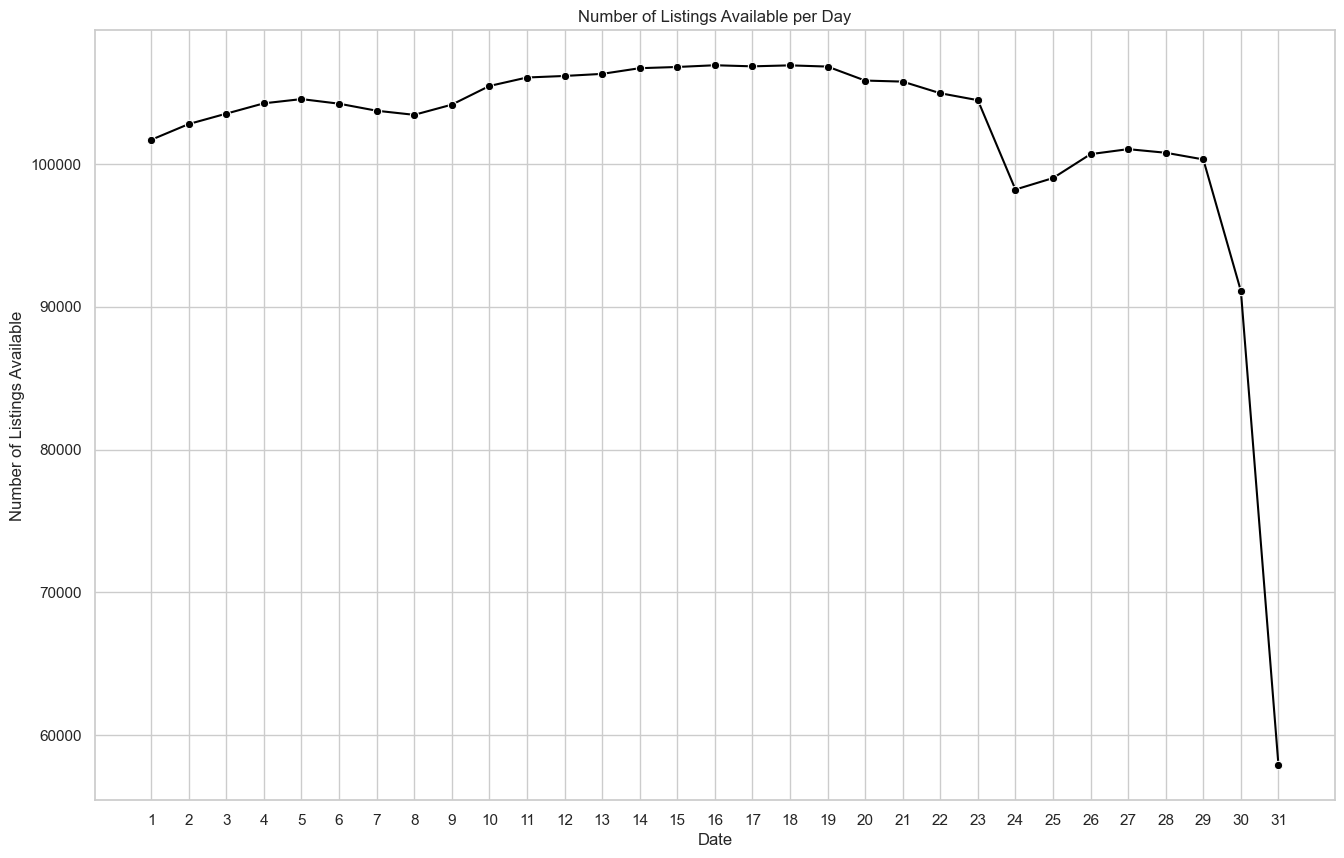

In [9]:
sns.set(style = "whitegrid")  
fig, ax = plt.subplots(figsize=(16, 10))

sns.lineplot(x = availability.index, y = availability.values, marker = "o", color = "black", ax = ax, alpha = 1)

ax.set_title("Number of Listings Available per Day")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Listings Available")
ax.set_xticks(range(1, 32))

plt.show()

In [10]:
mean_listings_days_24_31 = availability.loc[24:31].mean()
mean_listings_days_24_31

93631.875

## Reviews, Occupacy per Listing, Average Income

We are going to read the file `reviews.csv.gz`and name it "reviews_detailed". From this file we will use the columns:
- listing_id: *The id of every listing with a review*
- id: *The id of reviews*
- date: *The date the reviews were aploaded*
<br/>

We want to asses the number of reviews for every airbnb from the "reviews_detailed" file. After that, we will use the results to create a histogram showing the number of reviews per listing.
<br/>

The histogram will bin the number of reviews, from the minimum to the maximum number of reviews in a listing rounded up to the closest hundred. For this reason, the most suitable number of bins is 100.

- The maximum number of reviews is 890 and the minimum corresponds to 1. Althoough most airbnbs, up to 8.000, seem to have 1 - 100 reviews and only 16 out of 11.068 listings have up to 600 reviews.

In [11]:
reviews_detailed = pd.read_csv("reviews.csv.gz",
                      parse_dates=["date"])
reviews_detailed.loc[:, ["listing_id", "id", "date"]]

,listing_id,id,date
0,10595,271535,2011-05-20
1,10595,1994237,2012-08-15
2,10595,4678609,2013-05-20
3,10595,12502994,2014-05-04
4,10595,19482948,2014-09-13
...,...,...,...
652120,1027501913924137512,1033154620423406499,2023-11-26
652121,1027501913924137512,1043378550797123889,2023-12-10
652122,1028286259867636458,1031058218696915023,2023-11-23
652123,1028286259867636458,1031789747353084273,2023-11-24


In [12]:
reviews_per_listing = reviews_detailed.groupby(["listing_id"])["id"].count()
min_reviews = reviews_per_listing.min()
max_reviews = reviews_per_listing.max()
max_rounded_up = np.ceil(max_reviews / 100) * 100
print("min_reviews:", min_reviews)
print("max_reviews:", max_reviews)
print("max_rounded_up:", max_rounded_up)
print("reviews per listing > 600:", sum(reviews_per_listing > 600), "| total listings:", reviews_detailed["listing_id"].nunique())
print(sum(reviews_detailed["listing_id"].isna()))
print(sum(reviews_detailed["id"].isna()))
reviews_per_listing

min_reviews: 1
max_reviews: 890
max_rounded_up: 900.0
reviews per listing > 600: 16 | total listings: 11068
0
0


listing_id
10595                  45
10990                  71
10993                  93
10995                  30
27262                  23
                       ..
1044854083716723786     1
1045025263246273195     1
1045798883283175139     1
1047177827314723302     1
1048451054076287616     1
Name: id, Length: 11068, dtype: int64

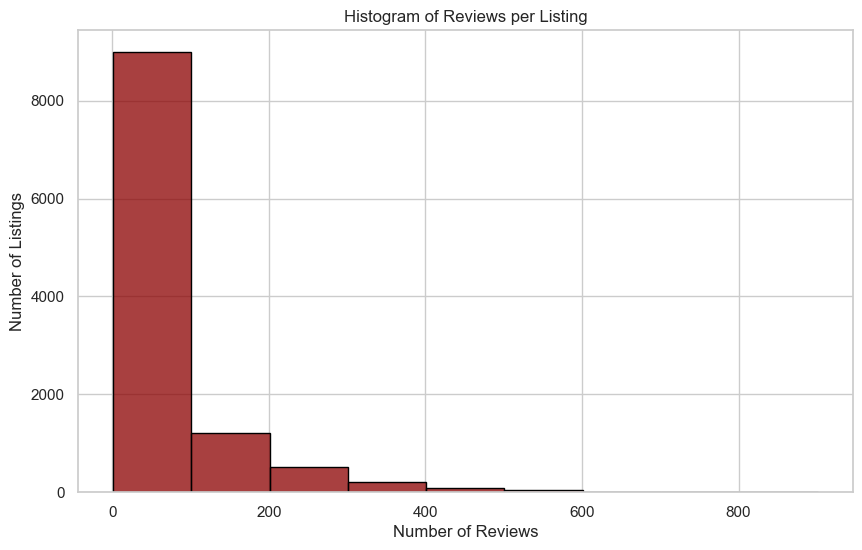

In [13]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10, 6))
sns.histplot(reviews_per_listing, bins = np.arange(min_reviews, max_rounded_up + 100, 100), kde = False, color = "darkred", edgecolor = "black")

plt.xlabel("Number of Reviews")
plt.ylabel("Number of Listings")
plt.title("Histogram of Reviews per Listing")

plt.show()

At this point of the analysis we are going to calculate the average occupacy per listing for every month. To achieve that, we will find the average reviews per month and we have to assume that only half of the bookings result in reviews.

<br/>
For this purpose, we merge the "listings" DataFrame with the "reviews_detailed" DataFrame, in or3der to use columns "listing_id", "id_rev" (the id of the reviews from the file "reviews_detailed") and "date".

In [14]:
listings_reviews = pd.merge(listings,
                            reviews_detailed,
                            left_on = "id",
                            right_on = "listing_id",
                            suffixes = ("_list", "_rev"))
listings_reviews.loc[:, ["listing_id", "id_rev", "date"]]

,listing_id,id_rev,date
0,653274914834812593,674463781096758699,2022-07-19
1,653274914834812593,701251712675185945,2022-08-25
2,653274914834812593,705587815526125363,2022-08-31
3,653274914834812593,710612922352061786,2022-09-07
4,653274914834812593,713593046808795938,2022-09-11
...,...,...,...
652120,502879,920073972323537172,2023-06-23
652121,502879,927350534117642458,2023-07-03
652122,502879,937543179373815083,2023-07-17
652123,502879,954896085161560598,2023-08-10


Moving on, we will extract the month from the "date" column into a new "month" column and calculate the average of the reviews after they have been grouped, first by listings and then by month to which the listings correspond. As mentioned, we are interested in the occupancy per month and not in the number of reviews, so according to the conclusion made above, the average occupancy per month has to be multiplied by the number 2.  
<br/>
From the results we conclude that the most busy month is September, with total occupancy of 1.280.642 bookings and the one with the minimum occupancy is February, with total occupancy equal to 1.119.546 bookings.

In [15]:
listings_reviews["month"] = listings_reviews["date"].dt.month
reviews_per_listing_merged = listings_reviews.groupby(["listing_id"])["id_rev"].count()

reviews_detailed["reviews_per_listing"] = reviews_per_listing_merged[reviews_detailed["listing_id"]].values

reviews_detailed["month"] = reviews_detailed["date"].dt.month

average_reviews_per_month = reviews_detailed.groupby(["listing_id", "month"])["reviews_per_listing"].mean()
average_occupancy_per_month = average_reviews_per_month * 2

occupancy = pd.DataFrame({
    "listing_id": average_reviews_per_month.index.get_level_values("listing_id"),
    "month": average_reviews_per_month.index.get_level_values("month"),
    "average_reviews": average_reviews_per_month.values,
    "occupancy": average_occupancy_per_month.values
})

occupancy

,listing_id,month,average_reviews,occupancy
0,10595,1,45.0,90.0
1,10595,2,45.0,90.0
2,10595,3,45.0,90.0
3,10595,4,45.0,90.0
4,10595,5,45.0,90.0
...,...,...,...,...
81399,1044854083716723786,12,1.0,2.0
81400,1045025263246273195,12,1.0,2.0
81401,1045798883283175139,12,1.0,2.0
81402,1047177827314723302,12,1.0,2.0


In [16]:
monthly_total_occupancy = occupancy.groupby("month")["occupancy"].sum()
max_occupancy_month = monthly_total_occupancy.idxmax()
max_occupancy_total = monthly_total_occupancy.loc[max_occupancy_month]

min_occupancy_month = monthly_total_occupancy.idxmin()
min_occupancy_total = monthly_total_occupancy.loc[min_occupancy_month]

print(f"The month with the maximum occupancy is {max_occupancy_month}, with total occupancy {max_occupancy_total}")
print(f"The month with the minimum occupancy is {min_occupancy_month}, with total occupancy {min_occupancy_total}")

The month with the maximum occupancy is 9, with total occupancy 1280642.0
The month with the minimum occupancy is 2, with total occupancy 1119546.0


Now, we want to find out the average income of the airbnbs per month. For that, we assume that each booking implies a three-night stay.<br/>
We need to merge the DataFrames "listings" and "calendar" and use the columns "listing_id", "date", "price_cal" (the "price" column of the "calendar" file) from the merged DataFrame "listings_calendar".

In [17]:
listings_calendar = pd.merge(listings,
                             calendar,
                             right_on = "listing_id",
                             left_on = "id",
                             suffixes = ("_list", "_cal"))
listings_calendar.loc[:, ["listing_id", "date", "price_cal"]]

,listing_id,date,price_cal
0,40042598,2023-12-26,$25.00
1,40042598,2023-12-27,$25.00
2,40042598,2023-12-28,$25.00
3,40042598,2023-12-29,$25.00
4,40042598,2023-12-30,$25.00
...,...,...,...
4812167,502879,2024-12-20,$62.00
4812168,502879,2024-12-21,$62.00
4812169,502879,2024-12-22,$62.00
4812170,502879,2024-12-23,$62.00


In [18]:
print(sum(listings_calendar["date"].isna()))
print(sum(listings_calendar["price_cal"].isna()))
print(listings_calendar["price_cal"].dtype)
listings_calendar["price_cal"] = pd.to_numeric(listings_calendar["price_cal"].replace("[\$,]", "", regex = True), errors = "coerce")
print(listings_calendar["price_cal"].dtype)

0
0
object
float64


To calculate the average income, we need the sum of the listings and the total number of values for each of these listings. Then, according to the above assumption, we will multiply the calculated sum by the number 3, and the result obtained is the income. Eventually, the average income of the listings is obtained by dividing the income by the total number of unique months.<br/> To see the final results, we group the income by month. 

According to the results, the month with the highest average income is May, with an average income equal to \\$13.431.489,50, and the month with the lowest average income is April with an average income of \\$84.97.035,25.

In [19]:
listings_calendar["month"] = listings_calendar["date"].dt.month

calendar_counts = listings_calendar["listing_id"].value_counts().reset_index()
calendar_counts.columns = ["listing_id", "count"]

calendar_counts["sum_prices"] = listings_calendar.groupby("listing_id")["price_cal"].sum().values
calendar_counts["income"] = calendar_counts["sum_prices"] * 3
total_months = len(listings_calendar["month"].unique())
calendar_counts["average_income"] = calendar_counts["income"] / total_months

max_average_income_listing = calendar_counts.loc[calendar_counts["average_income"].idxmax()]
min_average_income_listing = calendar_counts.loc[calendar_counts["average_income"].idxmin()]

calendar_counts.head(5)

,listing_id,count,sum_prices,income,average_income
0,54171242,366,65700.0,197100.0,16425.00
1,725008851260997466,366,36500.0,109500.0,9125.00
2,934069108170613198,366,21900.0,65700.0,5475.00
3,27774424,366,32850.0,98550.0,8212.50
4,821814020915691370,366,26645.0,79935.0,6661.25


In [20]:
listings_calendar["date"] = pd.to_datetime(listings_calendar["date"])
listings_calendar["month"] = listings_calendar["date"].dt.month
calendar_counts["month"] = listings_calendar["month"] 

monthly_total_income = calendar_counts.groupby("month")["average_income"].sum().reset_index()
monthly_total_income.columns = ["month", "total_income"]
monthly_total_income

,month,total_income
0,1,9874496.00
1,2,8741895.25
2,3,10063690.25
3,4,8497035.25
4,5,13431489.50
5,6,9195104.75
6,7,11166166.25
7,8,12564792.00
8,9,9344404.75
9,10,9315815.00


## Listings per Room Type

At this part, we aim to show the number of listings per room type, in absolute numbers and the percentage of listings for each particular room type. <br/>

For calculating the absolute number of listings per room type, we group the data by the "room_type" column and then we aggregate the count of listings. For calculating the percentage we divide the "absolute_numbers" we just found for each room type by the total sum of them and in the end we multiply the result by 100.

In [21]:
listings_per_room_type = (listings.groupby("room_type")["id"].agg(["count"]).reset_index().
                          rename(columns={"count": "absolute_numbers"}))

listings_per_room_type["percentage"] = (listings_per_room_type["absolute_numbers"] / listings_per_room_type["absolute_numbers"].sum() * 100).round(2).astype(str) + "%" 
listings_per_room_type

,room_type,absolute_numbers,percentage
0,Entire home/apt,11906,90.32%
1,Hotel room,102,0.77%
2,Private room,1091,8.28%
3,Shared room,83,0.63%


Then, we want to show the number of listings per neighrbourhood and room type. We just have to group by neighbourhood and then by room type the listing ids from the "listings" DataFrame. After that, we sum the number of entries and we calculate the percentage as before.

In [22]:
listings_per_neighborhood_room_type = (
    listings
    .groupby(["neighbourhood_cleansed", "room_type"])["id"]
    .agg(["count"])
    .reset_index()
    .rename(columns={"count": "absolute_numbers"})
)

listings_per_neighborhood_room_type["percentage"] = (listings_per_neighborhood_room_type["absolute_numbers"] / listings_per_neighborhood_room_type["absolute_numbers"].sum() * 100).round(2).astype(str) + "%" 

listings_per_neighborhood_room_type

,neighbourhood_cleansed,room_type,absolute_numbers,percentage
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,Entire home/apt,53,0.4%
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Entire home/apt,31,0.24%
2,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,Private room,5,0.04%
3,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,709,5.38%
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Private room,108,0.82%
...,...,...,...,...
107,ΣΤΑΔΙΟ,Shared room,1,0.01%
108,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Entire home/apt,74,0.56%
109,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Hotel room,4,0.03%
110,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,Private room,4,0.03%


## Prices per Day

Τo obtain the average prices per day for every listing first of all we have to create a table by grouping the price from the "listings_calendar" DataFrame by listing_id. Then, we merge the DataFrames "price_per_day" and "calendar", in order to group the new price by day as well.
<br/>

To gain a better perspective on the average prices per day we will make a line plot with the days on the x axis and the average price on the y axis.
<br/>

According to the results, the average price seems to be the same for all days, except days 24 and 25, where on the 24ᵗʰ day the price rises from \\$101,39 to \\$102,15 and on the 25ᵗʰ day the price falls from \\$102,15 to \\$100,56.
<br/>

This rise in the price of the 24thᵗʰ day can be explained by the sharp decrease in available listings observed in an earlier part of the analysis (law of demand).


In [23]:
price_per_day = listings_calendar.groupby("listing_id")["price_cal"].mean().round(2).reset_index()  
price_per_day_calendar = pd.merge(price_per_day,
                            calendar,
                            on = "listing_id")

price_per_day_calendar["day"] = price_per_day_calendar["date"].dt.day
price_per_day_calendar['price_per_day'] = price_per_day_calendar.groupby("date")["price_cal"].transform('mean')

print("The price per day for day 24 is:", price_per_day_calendar[price_per_day_calendar["day"] == 24]["price_cal"].mean())
print("The price per day for day 25 is:", price_per_day_calendar[price_per_day_calendar["day"] == 25]["price_cal"].mean())
price_per_day_calendar['price_per_day']

The price per day for day 24 is: 102.14740792459418
The price per day for day 25 is: 100.55763547433763


0           88.523767
1          101.385222
2          101.385222
3          101.385222
4          101.385222
              ...    
4812167    101.385222
4812168    101.385222
4812169    101.385222
4812170    101.385222
4812171    101.385222
Name: price_per_day, Length: 4812172, dtype: float64

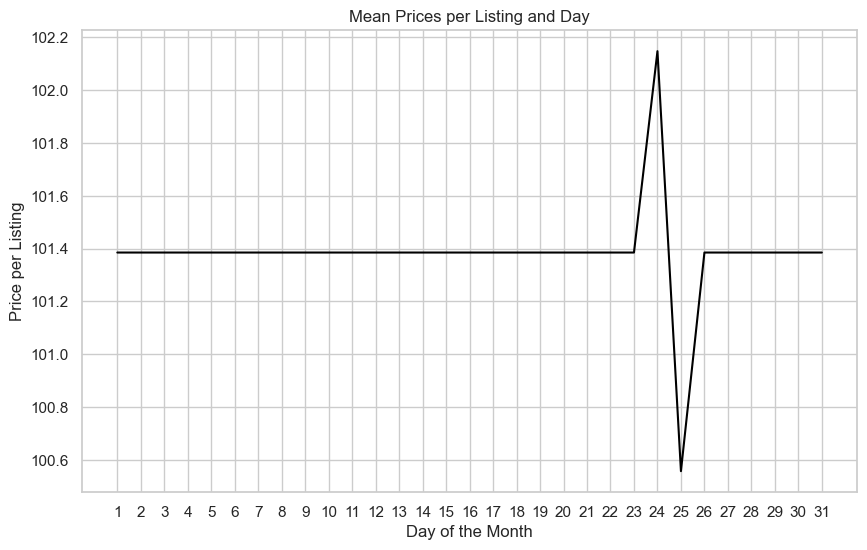

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "day", y="price_per_day", data = price_per_day_calendar, color = "black", errorbar = None)
plt.xticks(range(1, 32))
plt.xlabel("Day of the Month")
plt.ylabel("Price per Listing")
plt.title("Mean Prices per Listing and Day")
plt.show()

## Listings per Host

We want to investigate the listings held by each host. 
We are going to count the number of listing ids for every host and then sort them in descending order, starting from the one with the most listings.
<br/>
Then, we will create a scatter plot that will show the distribution of listings per host. But first, we will calculate the ranking of hosts. In more detail, the first host will be the one with the maximum number of listings and so on. In case there is a number of hosts with the same listings, they will be added in consecutively. On the x axis there will be the ranking scale and on the 𝑦 axis the number of listings.
<br/>

Apart from this polt, we will create one more, this time using logarithmic scale for the host ranking, providing a smoother representation of the distribution of listings per host.

In [25]:
listings_per_host = listings.groupby("host_id")["id"].count().reset_index()
listings_per_host = listings_per_host.rename(columns={"id": "number_of_listings"})
listings_per_host = listings_per_host.sort_values(by="number_of_listings", ascending=False)

unique_listings = listings[['host_id', 'host_name']].drop_duplicates()
listings_per_host = listings_per_host.merge(unique_listings, on='host_id', how='left')

listings_per_host

,host_id,number_of_listings,host_name
0,20104194,121,Upstreet
1,113548208,101,Mgv
2,90390850,68,Evan&Anetta
3,113353393,64,Harry
4,47267002,62,Tèo
...,...,...,...
5835,133681771,1,Dimitris
5836,133627331,1,Maria
5837,133586844,1,Christos
5838,133513526,1,Lampros


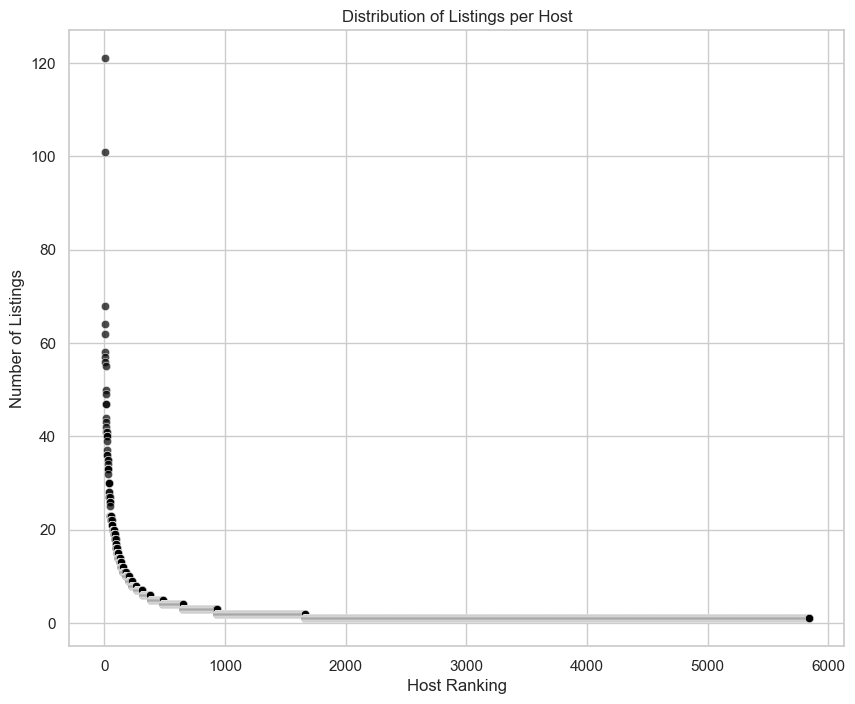

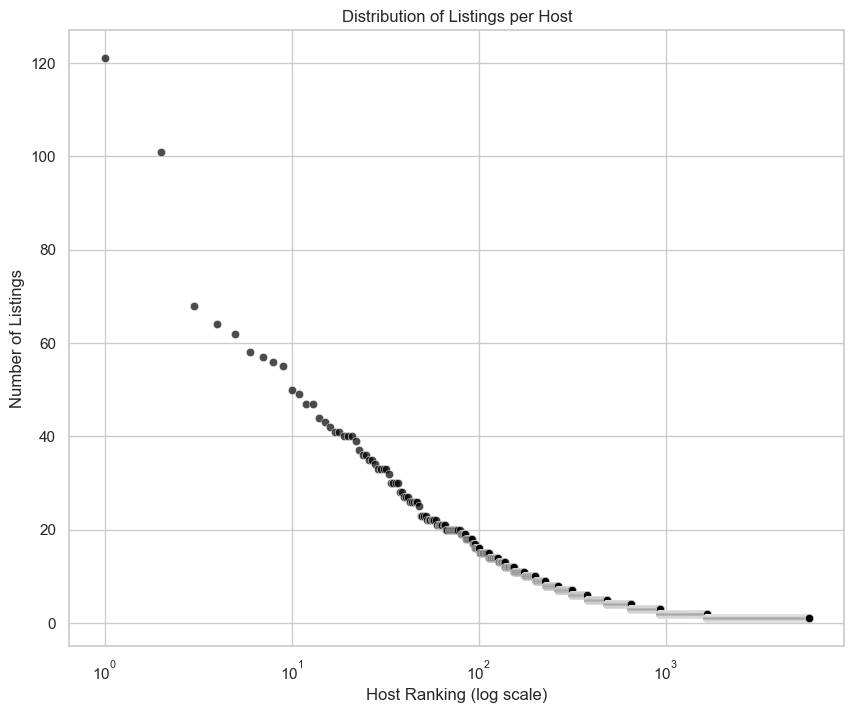

In [26]:
listings_per_host["ranking"] = range(1, len(listings_per_host) + 1)

plt.figure(figsize = (10, 8))
sns.scatterplot(x = "ranking", y = "number_of_listings", data = listings_per_host, marker = "o", color = "black", alpha = 0.7)

plt.xlabel("Host Ranking")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings per Host")

plt.show()

plt.figure(figsize = (10, 8))
sns.scatterplot(x = "ranking", y = "number_of_listings", data = listings_per_host, marker = "o", color = "black", alpha = 0.7)
plt.xscale("log")

plt.xlabel("Host Ranking (log scale)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings per Host")

plt.show()

## Visualize Listings

Now, we will create an interactive map of the city to display the listings available in Athens. For this purpose we will read the file `neighbourhoods.geojson` which includes data such as the neighbourhoods and their geographic coordinates. As we can see the file has been totally cleaned, so we can continue.
<br/>

We will to initialize the map using `folium.Map`, setting the initial center point at the latitude 37.9838 and longitude 23.7275, which corresponds to Athens, with a zoom level of 13. We enable the scale control for better map navigation and set a maximum zoom level to 15 to prevent excessive zooming. The GeoJson layer is added to the map to display the cleaned neighborhood coordinates.
<br/>

To enhance the visual representation of the numerous listings, we incorporate the "MarkerCluster" plugin from the "plugins" module. This feature clusters nearby markers together, providing a more organized and efficient way to explore the abundance of listing data. We iterate through the DataFrame of listings, creating individual markers with informative pop-up text containing details like Listing ID, Host ID, Neighborhood and Price.
<br/>

The resulting map, powered by Folium and plugins, offers an interactive and insightful visualization of Athens' listings and their geographical distribution.

In [27]:
neighborhoods_gdf = gpd.read_file("neighbourhoods.geojson")
drop_index = 1
neighborhoods_gdf = neighborhoods_gdf.drop(neighborhoods_gdf.columns[drop_index], axis = 1)
neighborhoods_gdf

,neighbourhood,geometry
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37..."
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,"MULTIPOLYGON (((23.73580 38.02347, 23.73345 38..."
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,"MULTIPOLYGON (((23.72923 37.98885, 23.72855 37..."
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,"MULTIPOLYGON (((23.73376 38.00839, 23.73363 38..."
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,"MULTIPOLYGON (((23.71199 37.99614, 23.71249 37..."
5,ΑΚΡΟΠΟΛΗ,"MULTIPOLYGON (((23.72432 37.97559, 23.72405 37..."
6,ΑΜΠΕΛΟΚΗΠΟΙ,"MULTIPOLYGON (((23.76916 37.99822, 23.76928 37..."
7,ΑΝΩ ΚΥΨΕΛΗ,"MULTIPOLYGON (((23.74582 38.00798, 23.74663 38..."
8,ΑΝΩ ΠΑΤΗΣΙΑ,"MULTIPOLYGON (((23.73994 38.02293, 23.74302 38..."
9,ΒΟΤΑΝΙΚΟΣ,"MULTIPOLYGON (((23.69862 37.99356, 23.70137 37..."


In [28]:
from folium import plugins
from folium.plugins import MarkerCluster

neighborhoods_geojson = neighborhoods_gdf.to_json()

athens_map = folium.Map(location = [37.9838, 23.7275], zoom_start = 13, control_scale = True, max_zoom = 15)

geojson_layer = folium.GeoJson(neighborhoods_geojson).add_to(athens_map)

marker_cluster = plugins.MarkerCluster().add_to(athens_map)

for index, listing in listings.iterrows():
    popup_text = f"Listing ID: {listing['id']}\nHost ID: {listing['host_id']}\nNeighborhood: {listing['neighbourhood_cleansed']}\nPrice: ${listing['price']:.2f}"

    folium.Marker(
        location = [listing["latitude"], listing["longitude"]],
        popup = folium.Popup(popup_text, parse_html = True),
        icon = folium.Icon(color = "blue")
    ).add_to(marker_cluster)

In [29]:
athens_map.save("athens_listings_map.html")